In [1]:
import pandas as pd
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import requests
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import networkx as nx

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: f'%.{2}f' % x)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('../8Jul2020-14Jul2020.csv')
df['Date'] = pd.to_datetime(df['Start Date'], dayfirst=True)
df.sort_values(by='Date', inplace=True)
df['Date'] = df['Date'].dt.date
df.head()

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,EndStation lat,EndStation long,EndStation nbBikes,EndStation nbStandardBikes,EndStation nbEBikes,EndStation nbEmptyDocks,EndStation nbDocks,StartStation lat,StartStation long,StartStation nbBikes,StartStation nbStandardBikes,StartStation nbEBikes,StartStation nbEmptyDocks,StartStation nbDocks,Date
0,99188805,780,13656,08/07/2020 00:13,476,"Stebondale Street, Cubitt Town",08/07/2020 00:00,532,"Jubilee Plaza, Canary Wharf",51.49,-0.01,26,24,2,3,29,51.50,-0.02,46,45,1,17,63,2020-07-08
1,99188806,180,4393,08/07/2020 00:03,531,"Twig Folly Bridge, Mile End",08/07/2020 00:00,517,"Ford Road, Old Ford",51.53,-0.04,6,6,0,15,21,51.53,-0.03,2,2,0,16,18,2020-07-08
2,99188809,960,8973,08/07/2020 00:17,508,"Fournier Street, Whitechapel",08/07/2020 00:01,779,"Houndsditch, Aldgate",51.52,-0.07,8,8,0,10,18,51.51,-0.08,3,3,0,25,28,2020-07-08
3,99188810,960,7141,08/07/2020 00:17,508,"Fournier Street, Whitechapel",08/07/2020 00:01,779,"Houndsditch, Aldgate",51.52,-0.07,8,8,0,10,18,51.51,-0.08,3,3,0,25,28,2020-07-08
4,99188807,600,15085,08/07/2020 00:11,201,"Dorset Square, Marylebone",08/07/2020 00:01,797,"Ossulston Street, Somers Town",51.52,-0.16,15,15,0,1,16,51.53,-0.13,28,27,1,2,30,2020-07-08


In [3]:
temp = df.groupby(['Date', 'StartStation Name', 'EndStation Name', 'StartStation lat', 'StartStation long',
                  'EndStation lat', 'EndStation long'])['Duration'].agg(['mean'])
temp.reset_index(drop=False, inplace=True)
temp.head()

,Date,StartStation Name,EndStation Name,StartStation lat,StartStation long,EndStation lat,EndStation long,mean
0,2020-07-08,"Abbey Orchard Street, Westminster","Abbey Orchard Street, Westminster",51.50,-0.13,51.50,-0.13,1720.00
1,2020-07-08,"Abbey Orchard Street, Westminster","Aldersgate Street, Barbican",51.50,-0.13,51.52,-0.10,1140.00
2,2020-07-08,"Abbey Orchard Street, Westminster","Beaumont Street, Marylebone",51.50,-0.13,51.52,-0.15,1020.00
3,2020-07-08,"Abbey Orchard Street, Westminster","Belgrove Street , King's Cross",51.50,-0.13,51.53,-0.12,1110.00
4,2020-07-08,"Abbey Orchard Street, Westminster","Bricklayers Arms, Borough",51.50,-0.13,51.50,-0.09,1140.00


In [4]:
sorted(temp['EndStation Name'].unique()) == sorted(temp['StartStation Name'].unique())

True

In [5]:
N = 200

temp3 = temp['StartStation Name'].values[:N]
temp4 = temp[['StartStation lat', 'StartStation long']].apply(tuple, axis=1).values[:N]

temp5 = temp['EndStation Name'].values[:N]
temp6 = temp[['EndStation lat', 'EndStation long']].apply(tuple, axis=1).values[:N]

pos1 = {A: B for A, B in zip(temp3, temp4)}
pos2 = {A: B for A, B in zip(temp5, temp6)}
pos = {**pos1, **pos2}

In [6]:
temp3 = temp['StartStation Name'].values
temp4 = temp[['StartStation lat', 'StartStation long']].apply(tuple, axis=1).values

pos = {A: B for A, B in zip(temp3, temp4)}

In [7]:

X = np.array(temp[['StartStation Name', 'EndStation Name']])[:N]
y = np.array(temp['mean'])[:N]

temp1 = temp[['StartStation Name', 'EndStation Name']].apply(tuple, axis=1).values[:N]
temp2 = temp['mean'].values[:N]

edge_labels = {A: B for A, B in zip(temp1, temp2)}
# edge_labels

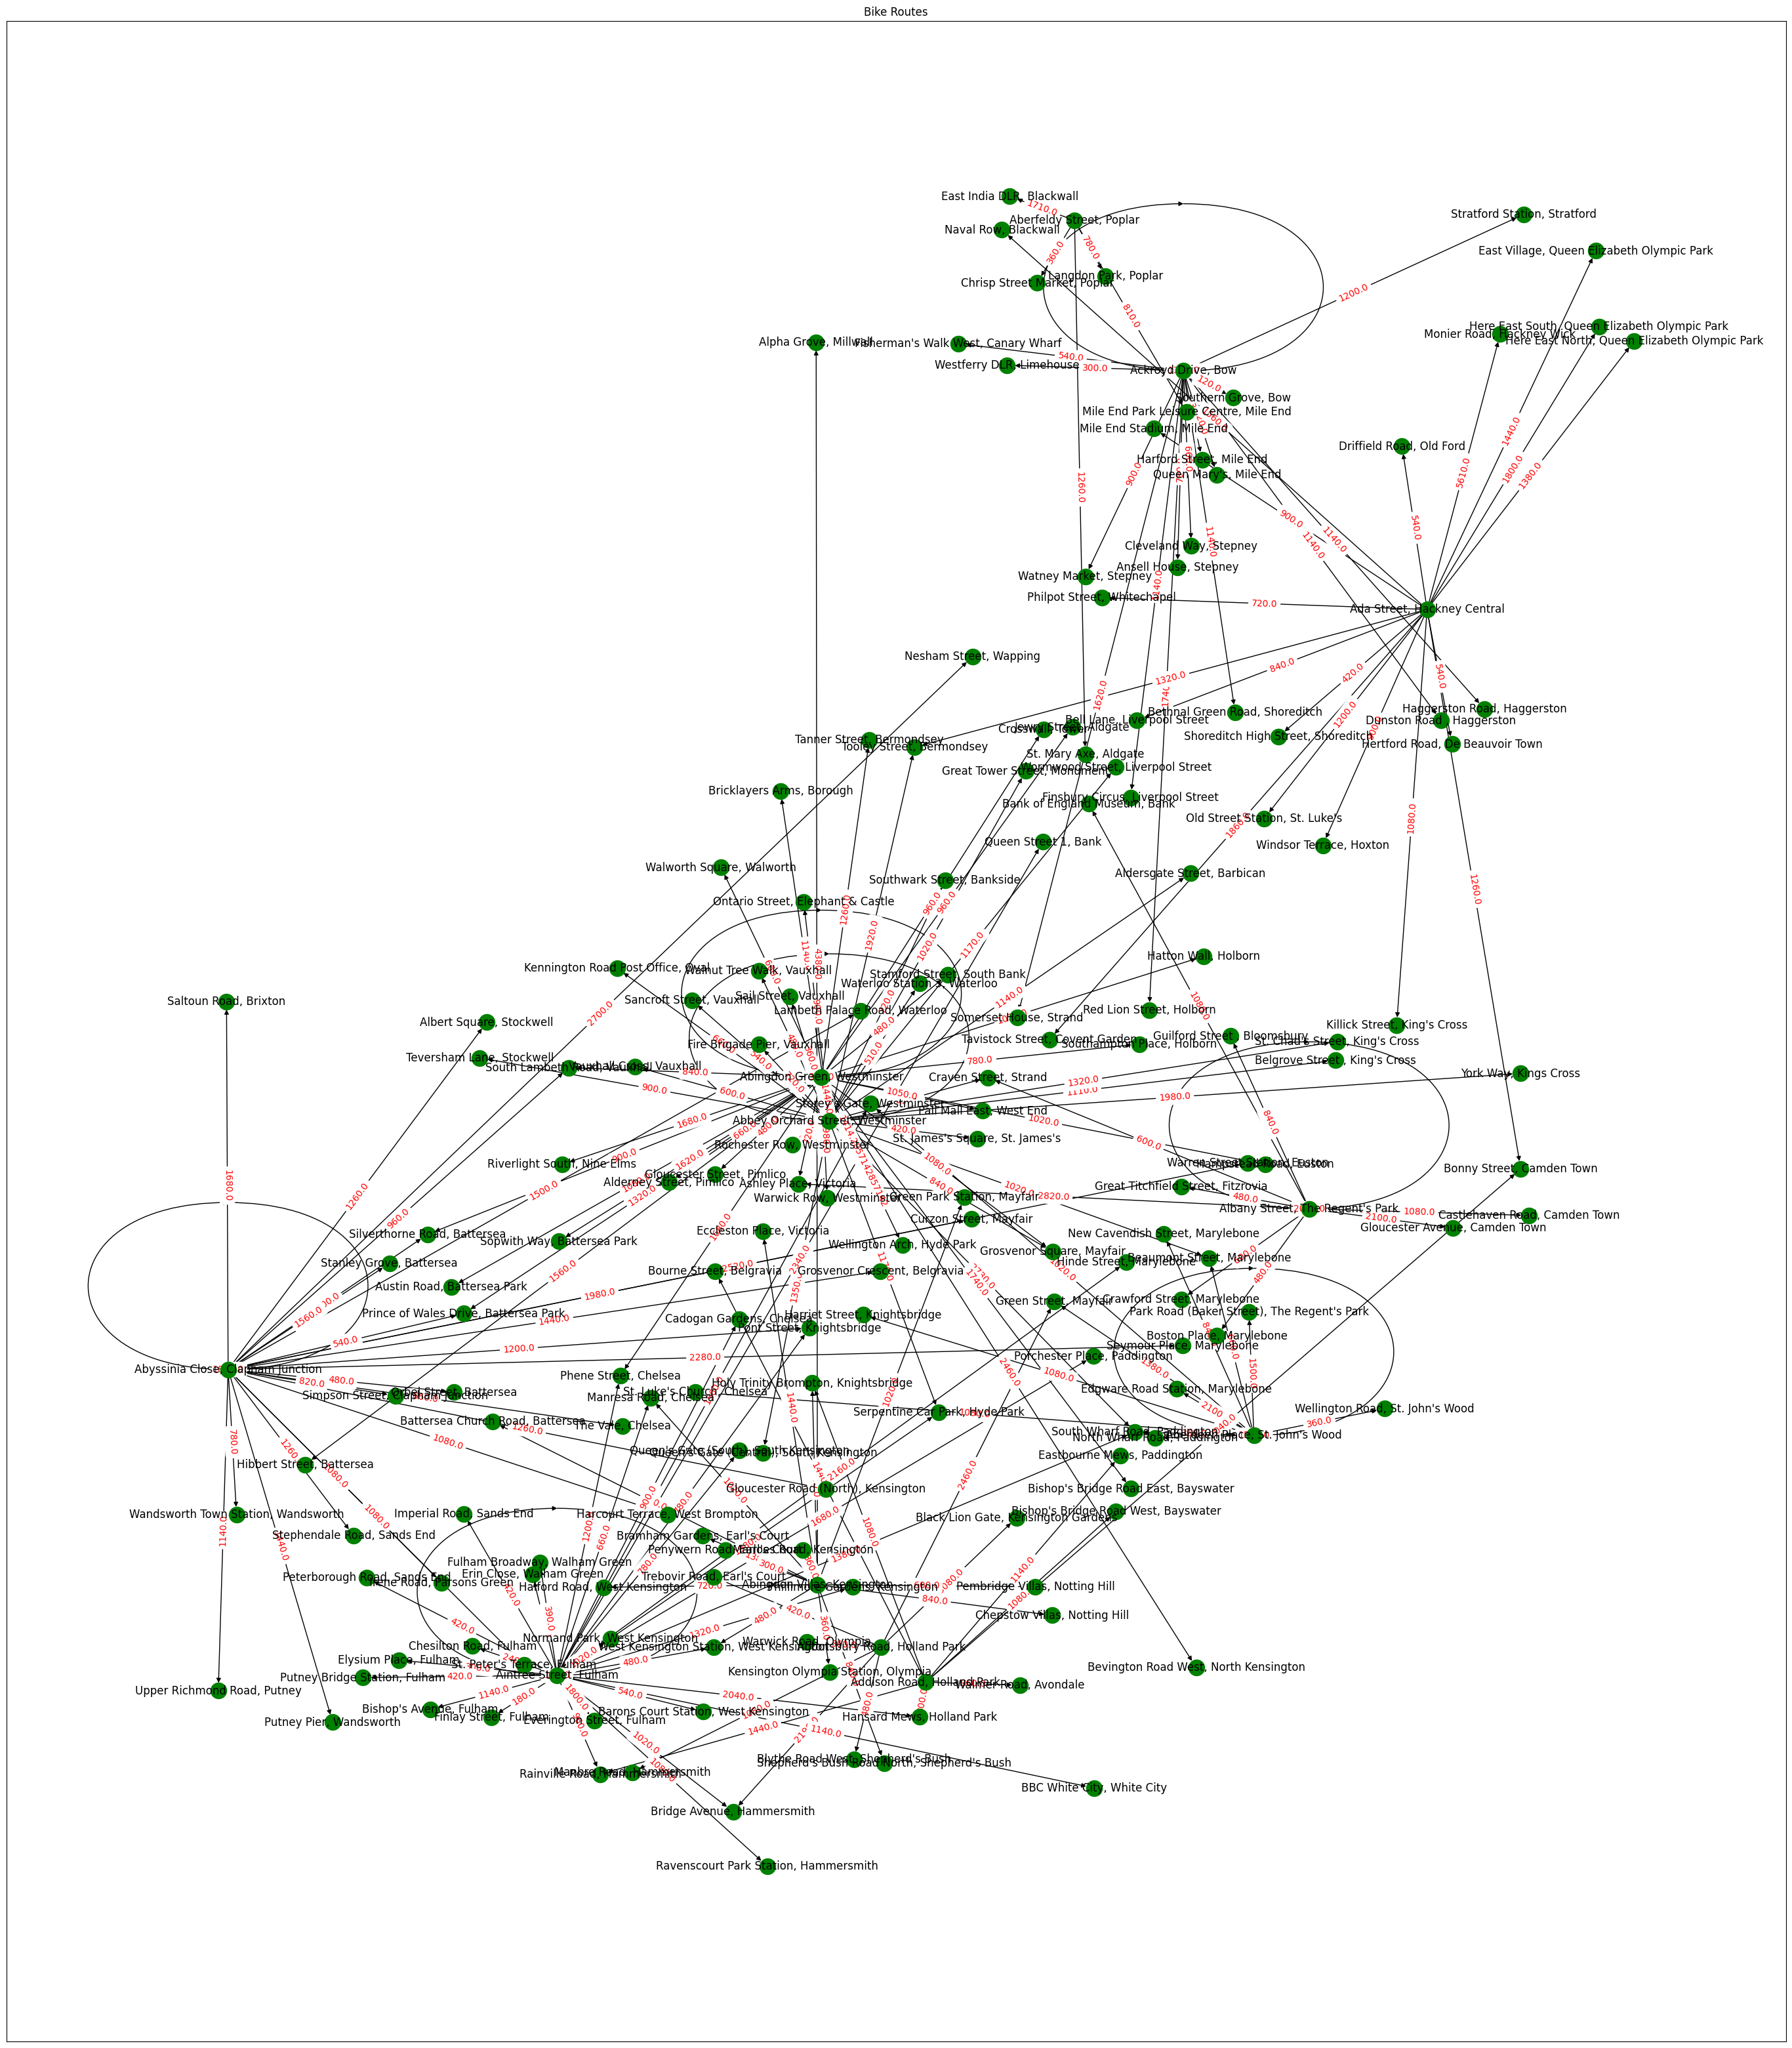

In [8]:
G = nx.DiGraph()
G.add_edges_from(X)
plt.figure(figsize =(35, 40))
nx.draw_networkx(G, pos = pos, node_color ='green')
nx.draw_networkx_edge_labels(G, pos = pos,
                             edge_labels=edge_labels,
                             font_color='red')


plt.title("Bike Routes")
plt.show()